In [12]:
import os
import re
import matplotlib.pyplot as plt

results_path = "../results"

def extract_sysbench_value(filepath, metric):
    with open(filepath, "r") as f:
        content = f.read()

    if metric == "cpu_time":
        match = re.search(r"total time:\s+([\d\.]+)s", content)
        return float(match.group(1)) if match else None

    elif metric == "disk_read_speed":
        match = re.search(r"read, MiB/s:\s+([\d\.]+)", content)
        return float(match.group(1)) if match else None

    return None


In [13]:
# VM
vm_cpu_time = extract_sysbench_value(os.path.join(results_path, "cpu_test_vm.txt"), "cpu_time")
vm_disk_speed = extract_sysbench_value(os.path.join(results_path, "disk_test_vm.txt"), "disk_read_speed")

# Docker
docker_cpu_time = extract_sysbench_value(os.path.join(results_path, "cpu_test_docker.txt"), "cpu_time")
docker_disk_speed = extract_sysbench_value(os.path.join(results_path, "disk_test_docker.txt"), "disk_read_speed")



In [14]:
print("⏱️ CPU Time")
print(f"VM: {vm_cpu_time}s")
print(f"Docker: {docker_cpu_time}s")

print("\n📂 Disk Read Speed")
print(f"VM: {vm_disk_speed} MiB/s")
print(f"Docker: {docker_disk_speed} MiB/s")


⏱️ CPU Time
VM: 10.0081s
Docker: 10.0008s

📂 Disk Read Speed
VM: 89.77 MiB/s
Docker: 2931.18 MiB/s


C:\Users\TESTER\AppData\Local\Temp\ipykernel_11592\1144298264.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\TESTER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


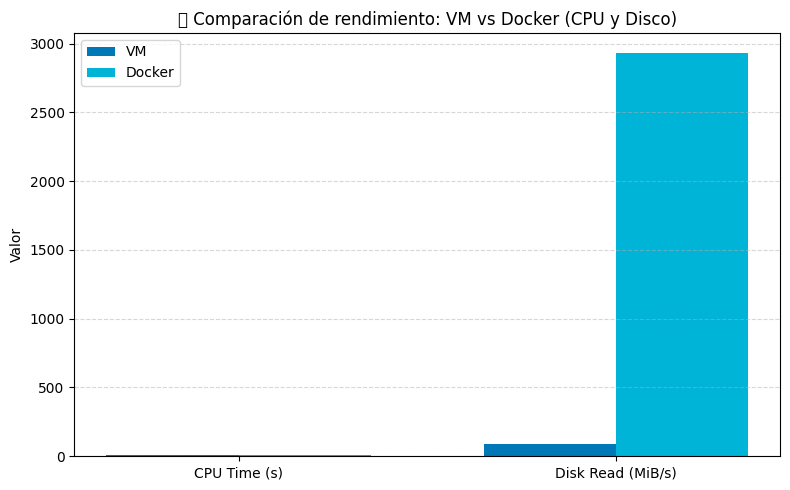

In [15]:
labels = ["CPU Time (s)", "Disk Read (MiB/s)"]
vm_values = [vm_cpu_time, vm_disk_speed]
docker_values = [docker_cpu_time, docker_disk_speed]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x, vm_values, width=width, label="VM", color="#0077b6")
plt.bar([i + width for i in x], docker_values, width=width, label="Docker", color="#00b4d8")

plt.xticks([i + width / 2 for i in x], labels)
plt.ylabel("Valor")
plt.title("📊 Comparación de rendimiento: VM vs Docker (CPU y Disco)")
plt.legend()
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
